In [16]:
# Import packages

import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sn
import datetime as dt

In [12]:
# Read in files

# Traffic Data
traffic = pd.read_csv('dft_rawcount_local_authority_2019.csv')


# Road Shape File

# Google Mobility Data

google = pd.read_csv('2020_London_Region_Mobility_Report.csv')

In [20]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22032 entries, 0 to 22031
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   count_point_id                22032 non-null  int64         
 1   direction_of_travel           22032 non-null  object        
 2   year                          22032 non-null  int64         
 3   count_date                    22032 non-null  datetime64[ns]
 4   hour                          22032 non-null  int64         
 5   region_id                     22032 non-null  int64         
 6   region_name                   22032 non-null  object        
 7   local_authority_id            22032 non-null  int64         
 8   local_authority_name          22032 non-null  object        
 9   road_name                     22032 non-null  object        
 10  road_type                     22032 non-null  object        
 11  start_junction_road_name    

In [19]:
traffic['count_date'] = pd.to_datetime(traffic['count_date'])
traffic['month'] = traffic['count_date'].dt.month

In [22]:
traffic.head()

,count_point_id,direction_of_travel,year,count_date,hour,region_id,region_name,local_authority_id,local_authority_name,road_name,...,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles,month
0,7044,S,2019,2019-07-19,15,6,London,145,Camden,A400,...,146,12,4,7,0,2,1,26,617,7
1,7044,S,2019,2019-07-19,18,6,London,145,Camden,A400,...,63,2,0,0,0,0,0,2,734,7
2,7044,S,2019,2019-07-19,17,6,London,145,Camden,A400,...,87,3,0,2,0,0,0,5,659,7
3,7044,S,2019,2019-07-19,9,6,London,145,Camden,A400,...,191,15,3,5,1,1,2,27,676,7
4,7044,S,2019,2019-07-19,10,6,London,145,Camden,A400,...,190,20,4,12,0,1,1,38,692,7


In [37]:
google.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12774 entries, 2 to 12935
Data columns (total 18 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   local_authority_name                                12774 non-null  object        
 1   country_region_code                                 12774 non-null  object        
 2   country_region                                      12774 non-null  object        
 3   sub_region_1                                        12774 non-null  object        
 4   sub_region_2                                        12774 non-null  object        
 5   metro_area                                          0 non-null      float64       
 6   iso_3166_2_code                                     12774 non-null  object        
 7   census_fips_code                                    0 non-null      float64       
 8   place_

In [24]:
# Convert dates to datetime, extract month and year
google['date'] = pd.to_datetime(google['date'])
google['month'] = google['date'].dt.month
google['year'] = google['date'].dt.year

In [25]:
google.head()

,local_authority_name,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,month,year
0,City of London,GB,United Kingdom,Greater London,City of London,NaN,GB-LND,NaN,ChIJ4Y3fTlUDdkgR0Gbsoi2uDgQ,2020-02-15,-5.0,-9.0,-12.0,-11,NaN,NaN,2,2020
1,City of London,GB,United Kingdom,Greater London,City of London,NaN,GB-LND,NaN,ChIJ4Y3fTlUDdkgR0Gbsoi2uDgQ,2020-02-16,-1.0,-21.0,-23.0,-13,NaN,NaN,2,2020
2,City of London,GB,United Kingdom,Greater London,City of London,NaN,GB-LND,NaN,ChIJ4Y3fTlUDdkgR0Gbsoi2uDgQ,2020-02-17,-3.0,-2.0,4.0,-1,-4.0,NaN,2,2020
3,City of London,GB,United Kingdom,Greater London,City of London,NaN,GB-LND,NaN,ChIJ4Y3fTlUDdkgR0Gbsoi2uDgQ,2020-02-18,-2.0,-2.0,-1.0,-2,-2.0,NaN,2,2020
4,City of London,GB,United Kingdom,Greater London,City of London,NaN,GB-LND,NaN,ChIJ4Y3fTlUDdkgR0Gbsoi2uDgQ,2020-02-19,-7.0,-4.0,5.0,0,-4.0,NaN,2,2020


In [26]:
# Drop NaN values for workplaces_percent_change

google.drop(google[google.workplaces_percent_change_from_baseline.isna()].index.values, axis=0, inplace=True)

In [68]:
google_2020 = google[google['year'] == 2020]
google_2021 = google[google['year'] == 2021]
google_2020.head()

,local_authority_name,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,month,year
2,City of London,GB,United Kingdom,Greater London,City of London,NaN,GB-LND,NaN,ChIJ4Y3fTlUDdkgR0Gbsoi2uDgQ,2020-02-17,-3.0,-2.0,4.0,-1,-4.0,NaN,2,2020
3,City of London,GB,United Kingdom,Greater London,City of London,NaN,GB-LND,NaN,ChIJ4Y3fTlUDdkgR0Gbsoi2uDgQ,2020-02-18,-2.0,-2.0,-1.0,-2,-2.0,NaN,2,2020
4,City of London,GB,United Kingdom,Greater London,City of London,NaN,GB-LND,NaN,ChIJ4Y3fTlUDdkgR0Gbsoi2uDgQ,2020-02-19,-7.0,-4.0,5.0,0,-4.0,NaN,2,2020
5,City of London,GB,United Kingdom,Greater London,City of London,NaN,GB-LND,NaN,ChIJ4Y3fTlUDdkgR0Gbsoi2uDgQ,2020-02-20,-7.0,-7.0,-11.0,-3,-3.0,NaN,2,2020
6,City of London,GB,United Kingdom,Greater London,City of London,NaN,GB-LND,NaN,ChIJ4Y3fTlUDdkgR0Gbsoi2uDgQ,2020-02-21,-3.0,-2.0,5.0,-3,-4.0,NaN,2,2020


In [99]:
# Create a summary Traffic table with average cars by month

traffic_avg = traffic.groupby(['local_authority_name', 'year', 'month', 'hour'])[['all_motor_vehicles']].mean()

#traffic_avg = traffic_avg.to_frame()

traffic_avg = traffic_avg.reset_index()

traffic_avg.head()

,local_authority_name,year,month,hour,all_motor_vehicles
0,Barking and Dagenham,2019,3,7,913.0
1,Barking and Dagenham,2019,3,8,1000.5
2,Barking and Dagenham,2019,3,9,898.5
3,Barking and Dagenham,2019,3,10,880.5
4,Barking and Dagenham,2019,3,11,807.0


In [100]:
# Create a summary Google table with average working % change by month

google2020_homeworking = google_2020.groupby(['local_authority_name', 'year', 'month'])[['workplaces_percent_change_from_baseline']].mean()

google2021_homeworking = google_2021.groupby(['local_authority_name', 'year', 'month'])[['workplaces_percent_change_from_baseline']].mean()

#google_homeworking = google_homeworking.to_frame()

#google_homeworking = google_homeworking.set_index(['local_authority_name', 'year', 'month'])

google2020_homeworking = google2020_homeworking.reset_index()

google2021_homeworking = google2021_homeworking.reset_index()

google2020_homeworking.head()

,local_authority_name,year,month,workplaces_percent_change_from_baseline
0,Barking and Dagenham,2020,2,-6.266667
1,Barking and Dagenham,2020,3,-23.096774
2,Barking and Dagenham,2020,4,-63.666667
3,Barking and Dagenham,2020,5,-53.354839
4,Barking and Dagenham,2020,6,-41.033333


In [101]:
#google_homeworking.to_csv("google_homeworking.csv")

In [102]:
# Join Google and Traffic data on local_authority_name and month. 

traffic_google2020 = pd.merge(traffic_avg, google2020_homeworking, on=['local_authority_name', 'month'])

traffic_google2020.head()

,local_authority_name,year_x,month,hour,all_motor_vehicles,year_y,workplaces_percent_change_from_baseline
0,Barking and Dagenham,2019,3,7,913.0,2020,-23.096774
1,Barking and Dagenham,2019,3,8,1000.5,2020,-23.096774
2,Barking and Dagenham,2019,3,9,898.5,2020,-23.096774
3,Barking and Dagenham,2019,3,10,880.5,2020,-23.096774
4,Barking and Dagenham,2019,3,11,807.0,2020,-23.096774


In [103]:
traffic_google2020['all_motor_vehicles_est'] = traffic_google2020['all_motor_vehicles']*(1+(traffic_google2020['workplaces_percent_change_from_baseline']/100))
#traffic_google2020_test = traffic_google2020['local_authority_name']

traffic_google2020 = traffic_google2020[['local_authority_name', 'year_y', 'month', 'hour', 'all_motor_vehicles_est']]


In [104]:

#traffic_google2020 = traffic_google2020.rename(columns = {'year_y' : 'year',
#                      'all_motor_vehicles_est' : 'all_motor_vehicles'})
traffic_google2020.head()

,local_authority_name,year_y,month,hour,all_motor_vehicles_est
0,Barking and Dagenham,2020,3,7,702.126452
1,Barking and Dagenham,2020,3,8,769.416774
2,Barking and Dagenham,2020,3,9,690.975484
3,Barking and Dagenham,2020,3,10,677.132903
4,Barking and Dagenham,2020,3,11,620.609032


In [105]:
traffic_avg = traffic_avg.append(traffic_google2020)
traffic_avg

,local_authority_name,year,month,hour,all_motor_vehicles,year_y,all_motor_vehicles_est
0,Barking and Dagenham,2019.0,3,7,913.0,NaN,NaN
1,Barking and Dagenham,2019.0,3,8,1000.5,NaN,NaN
2,Barking and Dagenham,2019.0,3,9,898.5,NaN,NaN
3,Barking and Dagenham,2019.0,3,10,880.5,NaN,NaN
4,Barking and Dagenham,2019.0,3,11,807.0,NaN,NaN
...,...,...,...,...,...,...,...
2635,Westminster,NaN,10,14,NaN,2020.0,241.432258
2636,Westminster,NaN,10,15,NaN,2020.0,235.226613
2637,Westminster,NaN,10,16,NaN,2020.0,242.673387
2638,Westminster,NaN,10,17,NaN,2020.0,245.939516


In [4]:
# Spatial Join to capture road-level data

In [106]:
# Create Traffic 2019 data, selecting one count date just to test

traffic_pivot = traffic_avg[['year', 'hour', 'month', 'local_authority_name', 'all_motor_vehicles']]
traffic_pivot.head()



,year,hour,month,local_authority_name,all_motor_vehicles
0,2019.0,7,3,Barking and Dagenham,913.0
1,2019.0,8,3,Barking and Dagenham,1000.5
2,2019.0,9,3,Barking and Dagenham,898.5
3,2019.0,10,3,Barking and Dagenham,880.5
4,2019.0,11,3,Barking and Dagenham,807.0


In [107]:
# Heatmap of car travel based on 2019 data, we have selected a specific month for now

traffic_pivot = pd.pivot_table(traffic_pivot, values ="all_motor_vehicles", index="local_authority_name", columns = "hour",
                                margins=False)


traffic_pivot

hour,7,8,9,10,11,12,13,14,15,16,17,18
local_authority_name,,,,,,,,,,,,
Barking and Dagenham,694.011111,705.833333,642.327778,584.361111,590.033333,621.361111,638.500000,683.808333,703.413889,765.444444,773.758333,724.655556
Barnet,735.763961,759.779545,684.134091,648.253571,654.356494,651.450325,673.771104,711.960714,754.376623,794.013961,812.890909,769.411364
Bexley,578.473214,593.812500,521.860119,467.502976,479.779762,492.363095,500.556548,545.386905,605.372024,625.541667,645.991071,563.851190
Brent,830.091270,821.795635,783.262897,777.854167,781.668651,778.386905,814.107143,827.518849,856.547619,888.604167,902.392857,883.020833
Bromley,308.314955,309.018750,250.337574,219.441518,211.540551,218.257738,219.492336,234.607887,269.810342,302.777976,321.214211,257.110342
Camden,269.999451,291.049359,287.774908,279.994322,290.613462,293.857601,296.861264,297.950275,316.579121,322.284524,324.471612,324.169139
City of London,373.833333,383.958333,378.833333,399.541667,389.333333,374.312500,379.104167,383.312500,387.250000,400.729167,398.541667,430.145833
Croydon,272.283324,308.673300,240.200951,212.513522,211.840133,222.746254,224.719941,242.214357,278.747547,282.112860,285.912445,271.147620
Ealing,794.098958,776.688889,737.190278,719.202778,724.821181,717.725347,720.884028,746.963542,794.768056,847.746181,830.344792,832.976736


<AxesSubplot:xlabel='hour', ylabel='local_authority_name'>

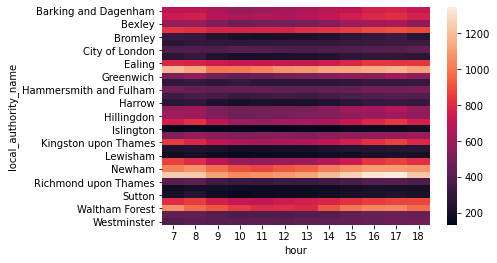

In [109]:
sn.heatmap(traffic_pivot)